In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import sys, os
from contextlib import contextmanager
import matplotlib as mpl
import seaborn as sns
import sklearn

In [3]:
df = pd.read_csv('data_lab2/climate_data.csv')
df

,dt,LandAverageTemperature
0,1/1/2010,3.737
1,2/1/2010,4.399
2,3/1/2010,6.738
3,4/1/2010,9.671
4,5/1/2010,12.406
5,6/1/2010,14.421
6,7/1/2010,15.213
7,8/1/2010,14.768
8,9/1/2010,12.863
9,10/1/2010,10.442


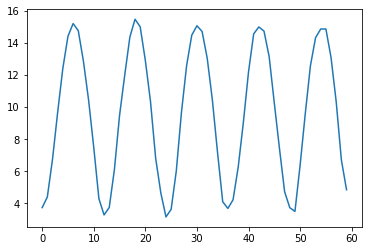

In [4]:
plt.plot(df['LandAverageTemperature'])
plt.show()

In [5]:
df['SeasonalIndex'] = np.nan
def AveragePerSeason(df, k, to_period):
    average_df = pd.DataFrame(columns = ['YearNo', 'AverageTemperature'])
    for i in range(0, to_period, k):
        average_per_year = df.loc[i : i + 11, 'LandAverageTemperature'].mean()
        average_df = average_df.append({'YearNo': i // 12,'AverageTemperature': average_per_year}, ignore_index = True)
        df.loc[i : i + 11, 'SeasonalIndex'] = df.loc[i : i + 11, 'LandAverageTemperature'] / average_per_year
    average_df['YearNo'] = average_df['YearNo'].astype(int)
    return average_df

year_no = int(len(df) / 12)
avg_df = AveragePerSeason(df, 12, year_no*12)
avg_df

,YearNo,AverageTemperature
0,0,9.703083
1,1,9.516000
2,2,9.507333
3,3,9.606500
4,4,9.570667


In [6]:
def LinearRegression(df, x_label, y_label):
    n = len(df)
    Sxy = (df[x_label] * df[y_label]).sum() - df[x_label].sum()*df[y_label].sum() / n
    Sxx =  (df[x_label] ** 2).sum() - (df[x_label].sum() ** 2) / n
    b1 = Sxy/Sxx
    b0 = df[y_label].mean() - b1 * df[x_label].mean()
    return b0, b1

b0, b1 = LinearRegression(avg_df, 'YearNo', 'AverageTemperature')
average_temperature_predict = b1 * year_no + b0
average_temperature_predict

9.528416666666669

In [7]:
df_prediction = pd.DataFrame(columns = ['Date', 'LandAverageTemperature'])
for i in range(12):
    avg_index = df.loc[i::12, 'SeasonalIndex'].mean()
    temperature_prediction_per_date = avg_index * average_temperature_predict
    df_prediction.loc[i] = [int(i+1), temperature_prediction_per_date]
    
df_prediction['Date'] = df_prediction['Date'].astype(int)

0      3.498117
1      3.875195
2      6.264396
3      9.441380
4     12.284914
5     14.359120
6     15.047836
7     14.743580
8     12.941902
9     10.305540
10     7.078801
11     4.500220
Name: LandAverageTemperature, dtype: float64

[]

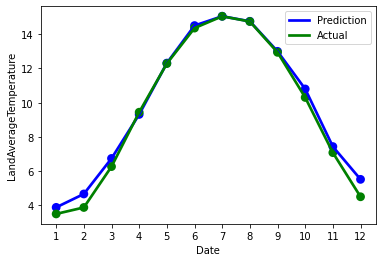

In [8]:
# actual data
df_actual = pd.read_csv('data_lab2/actual_climate.csv', header = None)
df_actual.columns = ['dt', 'LandAverageTemperature']
df_actual['Date'] = range(1,13)

# plot prediction
f, ax = plt.subplots(1,1)
sns.pointplot(x = 'Date', y = 'LandAverageTemperature', data = df_actual, color = 'b')
sns.pointplot(x = 'Date', y = 'LandAverageTemperature', data = df_prediction, color = 'g')
ax.legend(handles = ax.lines[::len(df_actual) + 1], labels =['Prediction', 'Actual'])
plt.plot()

0      3.737
1      4.399
2      6.738
3      9.671
4     12.406
5     14.421
6     15.213
7     14.768
8     12.863
9     10.442
10     7.487
11     4.292
12     3.282
Name: LandAverageTemperature, dtype: float64

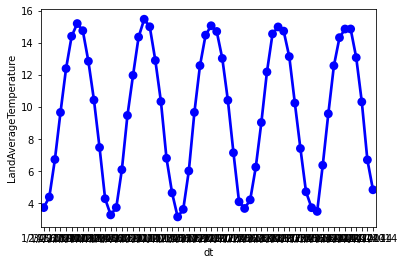

In [10]:
eval_df = pd.read_csv('data_lab2/actual_climate.csv')
eval_df = pd.concat([df, eval_df], ignore_index = True)
sns.pointplot(x = 'dt', y = 'LandAverageTemperature', data = eval_df, color = 'b')
eval_df['LandAverageTemperature'][0:13]

In [11]:
MSE = (eval_df['LandAverageTemperature'][0:13] - df_prediction['LandAverageTemperature'][0:13]) ** 2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Seasonal", MSE))

MSE of Seasonal: 0.07413819545513398
